# Day 7 notebook

The objectives of this notebook are to practice with the concepts of

* dot plots
* scoring sequence alignments

# Modules used in this notebook

In [10]:
import matplotlib.pyplot as plt # for plotting
import fasta                    # for reading FASTA files
import submatrix                # for reading substitution matrices

## Dot plots

### PROBLEM 1: Generating dot plot points (1 POINT)

A *dot plot* is a useful visualization technique for comparing a pair of sequences, $s_1$ and $s_2$.  In its simplest form, a dot plot is a scatterplot in which there is a point at coordinate $(x, y)$ if $s_1[x] = s_2[y]$.  Write a function below that gives a *list of points* that should be plotted in a dot plot for a pair of input sequences.  Each point should be represented as a two-element tuple, `(x, y)`.


In [11]:
def dot_plot_points(seq1, seq2):
    """Computes the coordinates of the points in a dot plot for seq1 compared to seq2.
    A point, (x,y), in such a plot represents positions at which seq1[x] == seq2[y].

    Args:
        seq1: the first string
        seq2: the second string
    Returns:
        A list of points, where each point is represented as a tuple, (x, y)
    """
    ### YOUR CODE HERE
    result = []
    for i, x in enumerate(seq1):
        for j, y in enumerate(seq2):
            if x == y:
                result.append((i, j))     
    #for x in range(len(seq1))
    #    for y in range(len(seq2))
    #        if seq1[x] == seq2[y]:
    #            result.append((x,y))
    print(result)
    return result

In [12]:
# tests for dot_plot_points
assert sorted(dot_plot_points("CGCA", "ACA")) == [(0, 1), (2, 1), (3, 0), (3, 2)]
assert sorted(dot_plot_points("ACGT", "ACGT")) == [(0, 0), (1, 1), (2, 2), (3, 3)]
assert sorted(dot_plot_points("ACGT", "TGCA")) == [(0, 3), (1, 2), (2, 1), (3, 0)]
assert sorted(dot_plot_points("TT", "TTT")) == [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
assert sorted(dot_plot_points("CACG", "TT")) == []
assert sorted(dot_plot_points("", "")) == []
print("SUCCESS: tests for dot_plot_points passed!")

[(0, 1), (2, 1), (3, 0), (3, 2)]
[(0, 0), (1, 1), (2, 2), (3, 3)]
[(0, 3), (1, 2), (2, 1), (3, 0)]
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
[]
[]
SUCCESS: tests for dot_plot_points passed!


### Plotting a dot plot

Next, we will practice generating a dot plot, using the function you wrote above.  

### Converting to a data frame
Before doing so, we will convert the output of your function into a data structure commonly used in data analysis known as *data frame*.  A data frame is simply a two dimensional table that is typically stored as a collection of columns of equal length, each column indexable by a human-readable name.  Often, the rows of such data frames represent observations and the columns represent variables for those observations (this is the philosophy of [tidy data](https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf)). Putting data into such a form often makes a lot of downstream analyses much easier, particularly if you are working with libraries that use the same philosophy.

Below is a function that will convert a list of tuples (such as generated by `dot_plot_points`) into a data frame, represented as a dictionary mapping column names to tuples.

In [13]:
def data_frame_from_tuple_list(tuples, column_names):
    """Converts a tabular dataset from a row-based data structure to a 
    column-based data structure.

    Args:
        tuples: a list of rows, where each row is a tuple of the same length
        column_names: a list of strings giving the names of the columns
    Returns:
        A dictionary with column names as keys and columns as values.
    """    
    columns = zip(*tuples) if tuples else [[] for i in range(len(column_names))]
    return dict(zip(column_names, columns))

Here is an example of running this function with some US city data.

In [14]:
data_frame_from_tuple_list([("Madison", "WI", 233209), 
                            ("Chicago", "IL", 2695598), 
                            ("St. Paul", "MN", 285068)],
                            ("city", "state", "population"))

{'city': ('Madison', 'Chicago', 'St. Paul'),
 'state': ('WI', 'IL', 'MN'),
 'population': (233209, 2695598, 285068)}

### A dot plot of English sentences
As a way to build some intuition as to how to intepret a dot plot, below is some code to build a dot plot between a pair of English sentences.  One sentence is a quote from [Dr. Suess](https://en.wikipedia.org/wiki/Dr._Seuss), and the other is a "mutated" version of that quote.  Examine the similarities and differences between the two sentences and see how they are reflected in the dot plot.

The example also shows how to use the [Plotting with keyword strings](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) feature of Pyplot to generate the plot.

[(0, 4), (0, 7), (1, 5), (1, 24), (1, 36), (1, 45), (1, 50), (2, 3), (2, 6), (2, 9), (2, 14), (2, 23), (2, 26), (2, 31), (2, 35), (2, 38), (2, 44), (2, 49), (2, 52), (3, 4), (3, 7), (4, 8), (5, 3), (5, 6), (5, 9), (5, 14), (5, 23), (5, 26), (5, 31), (5, 35), (5, 38), (5, 44), (5, 49), (5, 52), (6, 20), (7, 13), (7, 22), (7, 40), (8, 5), (8, 24), (8, 36), (8, 45), (8, 50), (9, 5), (9, 24), (9, 36), (9, 45), (9, 50), (10, 13), (10, 22), (10, 40), (11, 12), (11, 42), (12, 3), (12, 6), (12, 9), (12, 14), (12, 23), (12, 26), (12, 31), (12, 35), (12, 38), (12, 44), (12, 49), (12, 52), (13, 5), (13, 24), (13, 36), (13, 45), (13, 50), (14, 1), (14, 11), (14, 25), (14, 29), (14, 33), (14, 37), (14, 51), (14, 55), (15, 3), (15, 6), (15, 9), (15, 14), (15, 23), (15, 26), (15, 31), (15, 35), (15, 38), (15, 44), (15, 49), (15, 52), (16, 27), (16, 53), (17, 0), (17, 28), (17, 43), (17, 48), (17, 54), (18, 1), (18, 11), (18, 25), (18, 29), (18, 33), (18, 37), (18, 51), (18, 55), (19, 2), (19, 30), (1

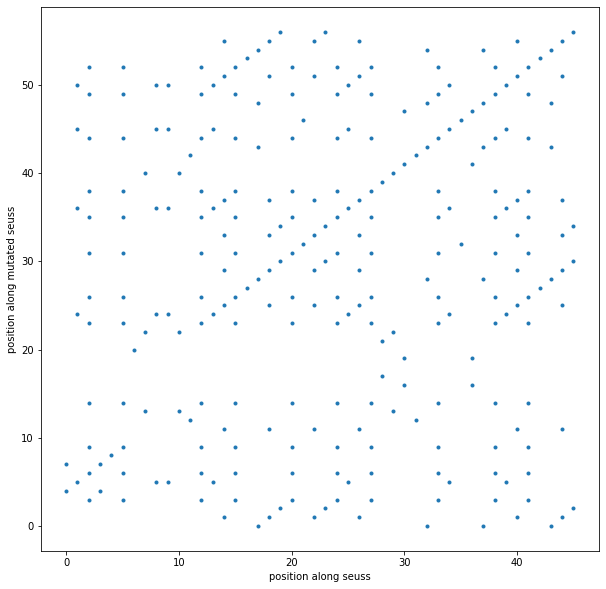

In [15]:
seuss = "it is better to know how to learn than to know"
mutated_seuss = "now it is more valuable to know how to learn than to know"

# Generate dot plot points and convert to a data frame
seuss_dot_plot_points = dot_plot_points(seuss, mutated_seuss)
seuss_dot_plot_data_frame = data_frame_from_tuple_list(seuss_dot_plot_points, 
                                                       ("seq1 position", "seq2 position"))

# Generate a dot plot using the data frame
plt.figure(figsize=(10, 10))
plt.scatter("seq1 position", "seq2 position", marker=".", data=seuss_dot_plot_data_frame)
plt.xlabel("position along seuss")
plt.ylabel("position along mutated seuss")
plt.show()

### A dot plot of alpha vs. delta globin
Included with this notebook is a FASTA-formatted file containing the amino acid sequences of human alpha and delta globin, which are homologous genes.  A normal variant of hemoglobin found in low levels in your blood is Hemoglobin A2 (HbA2), which consists of two polypeptides of alpha globin and two polypeptides of delta globin.  Here we will plot a dotplot of the amino acids sequences of these two genes.

[(0, 0), (0, 55), (0, 126), (1, 1), (1, 11), (1, 18), (1, 20), (1, 23), (1, 33), (1, 34), (1, 54), (1, 60), (1, 67), (1, 98), (1, 109), (1, 111), (1, 113), (1, 133), (1, 134), (1, 137), (2, 3), (2, 14), (2, 28), (2, 31), (2, 32), (2, 48), (2, 68), (2, 75), (2, 78), (2, 81), (2, 88), (2, 91), (2, 96), (2, 105), (2, 106), (2, 110), (2, 114), (2, 141), (3, 44), (3, 49), (3, 50), (3, 72), (3, 86), (3, 89), (4, 5), (4, 36), (4, 51), (4, 58), (4, 100), (4, 124), (5, 10), (5, 13), (5, 22), (5, 27), (5, 53), (5, 62), (5, 70), (5, 76), (5, 115), (5, 128), (5, 129), (5, 135), (5, 138), (5, 140), (5, 142), (6, 21), (6, 47), (6, 52), (6, 73), (6, 79), (6, 94), (6, 99), (7, 8), (7, 17), (7, 59), (7, 61), (7, 65), (7, 66), (7, 82), (7, 95), (7, 120), (7, 132), (7, 144), (8, 4), (8, 9), (8, 38), (8, 84), (8, 123), (9, 12), (9, 19), (9, 57), (9, 80), (9, 102), (9, 108), (9, 117), (9, 139), (10, 1), (10, 11), (10, 18), (10, 20), (10, 23), (10, 33), (10, 34), (10, 54), (10, 60), (10, 67), (10, 98), (10,

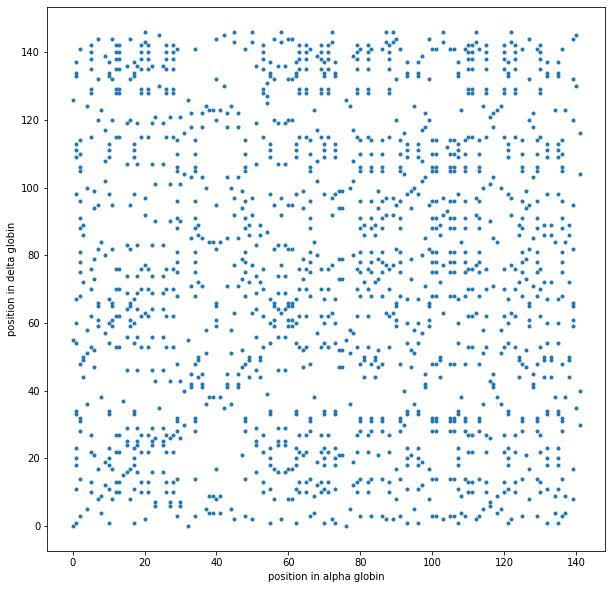

In [16]:
# Load the globin sequences into a dictionary, indexed by the sequence name
globin_seqs = dict(fasta.read_sequences_from_fasta_file("human_alpha_and_delta_globin.fasta"))

# Generate dot plot points and convert to a data frame
globin_dot_plot_points = dot_plot_points(globin_seqs["alpha"], globin_seqs["delta"])
globin_dot_plot_data_frame = data_frame_from_tuple_list(globin_dot_plot_points, 
                                                        ("seq1 position", "seq2 position"))

# Generate a dot plot using the data frame
plt.figure(figsize=(10, 10))
plt.scatter("seq1 position", "seq2 position", marker=".", data=globin_dot_plot_data_frame)
plt.xlabel("position in alpha globin")
plt.ylabel("position in delta globin")
plt.show()

What do you notice in this dot plot?  Do these two genes look related?

*ENTER YOUR THOUGHTS BELOW*

## PROBLEM 2: Generating dot plot points using a substitution matrix (1 point)
For amino acid sequences, it is often useful to generate dot plots that show pairs of positions that have exactly matching or *similar* amino acids.  In this problem, we will use a substitution matrix to determine which pairs of positions in two sequences have similar or exactly matching characters.  In general, the substitution score for a pair of similar or exactly matching characters will be a positive value, whereas the score for all other pairs of characters will be zero or negative.

### The BLOSUM62 substitution matrix

Included with this notebook is a module `submatrix` and a file containing the BLOSUM62 substitution matrix, which is commonly used in bioinformatics.  We will read this substitution matrix in below:

In [17]:
blosum62 = submatrix.read_substitution_matrix("BLOSUM62.txt")

In [18]:
# here are some of the entries of this matrix
print("S(W, W) =", blosum62[("W", "W")])
print("S(I, L) =", blosum62[("I", "L")])
print("S(S, P) =", blosum62[("S", "P")])

S(W, W) = 11
S(I, L) = 2
S(S, P) = -1


### Substitution matrix-derived dot plots

Write a function below which gives a list of *scored* points that should be plotted in a dot plot for a pair of input sequences and a given substitution matrix. Each point should be represented as a three-element tuple, `(x, y, score)`, where `score` is the substitution matrix score for the pair of characters at `(x, y)`.  Only points with positive scores should be output.

In [19]:
def dot_plot_points_with_matrix(seq1, seq2, matrix):
    """Computes the coordinates and scores of the points in a dot plot for seq1 compared to seq2.
    
    A point, (x,y), in such a plot represents positions at which matrix[(seq1[x], seq2[y])] > 0, i.e.,
    only points with positive score are returned.

    Args:
        seq1: the first string
        seq2: the second string
        matrix: a substitution matrix, using the representation of the submatrix module
    Returns:
        A list of scored points, where each point is represented as a tuple, (x, y, score)
    """
    ### YOUR CODE HERE
    return [(i, j, matrix[(c1, c2)])
            for i, c1 in enumerate(seq1) for j, c2 in enumerate(seq2)
            if matrix[(c1, c2)] > 0]


In [20]:
# tests for dot_plot_points_with_matrix
assert sorted(dot_plot_points_with_matrix("WCAG", "ACS", blosum62)) == [(1, 1, 9), (2, 0, 4), (2, 2, 1)]
assert sorted(dot_plot_points_with_matrix("ACT", "GS", blosum62)) == [(0, 1, 1), (2, 1, 1)]
assert sorted(dot_plot_points_with_matrix("CACG", "TT", blosum62)) == []
assert sorted(dot_plot_points_with_matrix("", "", blosum62)) == []
print("SUCCESS: dot_plot_points_with_matrix passed all tests!")

SUCCESS: dot_plot_points_with_matrix passed all tests!


### A substitution matrix-derived dot plot of alpha and delta globin
Now we will plot a dotplot of the amino acids sequences of the two globin genes, with these substitution matrix-based points.  We will map the score of each point to its color within the plot.

In [21]:
globin_dot_plot_scored_points = dot_plot_points_with_matrix(globin_seqs["alpha"], 
                                                            globin_seqs["delta"],
                                                            blosum62)
scored_column_names = ("seq1 position", "seq2 position", "score")
globin_dot_plot_scored_data_frame = data_frame_from_tuple_list(globin_dot_plot_scored_points, 
                                                               scored_column_names)

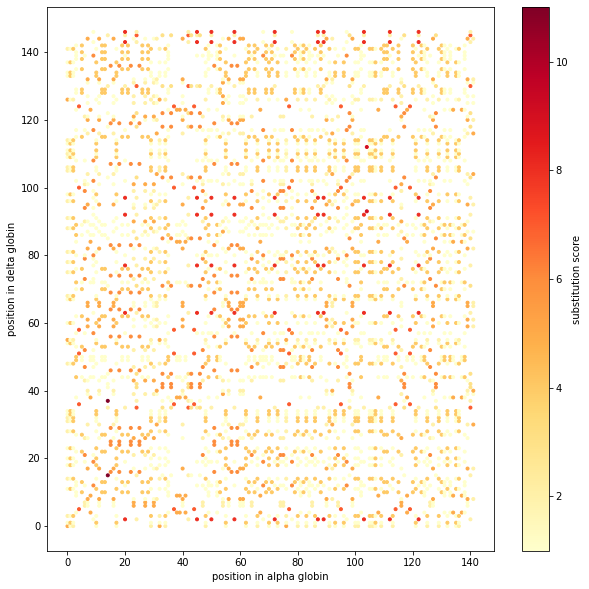

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter("seq1 position", "seq2 position", c="score", marker=".", 
            cmap="YlOrRd", data=globin_dot_plot_scored_data_frame)
plt.xlabel("position in alpha globin")
plt.ylabel("position in delta globin")
cbar = plt.colorbar()
cbar.set_label("substitution score")
plt.show()

What do you notice in this dot plot compared to the previous one?

*ENTER YOUR THOUGHTS HERE*

## PROBLEM 3: Generating dot plot points using k-mer matches (1 point)
As yet another variation on a dot plot, we can generalize the approach in problem 1 to compute points at which there are identical length $k$ substrings in the two strings (i.e., in problem 1, $k = 1$).  Setting $k > 1$ may allow us to filter out many of the spurious points in the problem 1 plot.

In [23]:
def dot_plot_kmer_points(seq1, seq2, k):
    """Computes the coordinates of the points in a k-mer dot plot for seq1 compared to seq2.
    
    A point, (x,y), in such a plot represents positions at which the length k substrings 
    starting at position x in seq1 and position y in seq2 are identical.

    Args:
        seq1: the first string
        seq2: the second string
        k: the length of the substrings to compare
    Returns:
        A list of points, where each point is represented as a tuple, (x, y)
    """
    ### YOUR CODE HERE
    return [(i, j) for i in range(len(seq1) - k + 1) for j in range(len(seq2) - k + 1)
            if seq1[i: i + k] == seq2[j: j + k]]


In [24]:
# tests for dot_plot_kmer_points
assert sorted(dot_plot_kmer_points("ATCGTAGC", "ACGTAGCGG", 2)) == [(2, 1), (2, 6), (3, 2), (4, 3), (5, 4), (6, 5)]
assert sorted(dot_plot_kmer_points("ATCGTAGC", "ACGTAGCGG", 3)) == [(2, 1), (3, 2), (4, 3), (5, 4)]
assert sorted(dot_plot_kmer_points("ATCGTAGC", "ACGTAGCGG", 4)) == [(2, 1), (3, 2), (4, 3)]
assert sorted(dot_plot_kmer_points("ATCGTAGC", "ACGTAGCGG", 7)) == []
assert sorted(dot_plot_kmer_points("CACG", "TT", 7)) == []
print("SUCCESS: tests for dot_plot_kmer_points passed!")

SUCCESS: tests for dot_plot_kmer_points passed!


### A k-mer dot plot of alpha and delta globin
Now we will plot a dotplot of the amino acids sequences of the two globin genes, with k-mer derived points, starting with $k = 2$.

In [ ]:
globin_dot_plot_kmer_points = dot_plot_kmer_points(globin_seqs["alpha"], 
                                                   globin_seqs["delta"],
                                                   2)
kmer_column_names = ("seq1 position", "seq2 position")
globin_dot_plot_kmer_data_frame = data_frame_from_tuple_list(globin_dot_plot_kmer_points, 
                                                             kmer_column_names)

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter("seq1 position", "seq2 position", marker=".", 
            data=globin_dot_plot_kmer_data_frame)
plt.xlabel("position in alpha globin")
plt.ylabel("position in delta globin")
plt.show()

What do you notice in this dot plot compared to the plot from problem 1?  What happens as you increase the value of $k$ beyond 2?

*ENTER YOUR THOUGHTS BELOW*

## PROBLEM 4: Scoring a sequence alignment (1 POINT)
Next, let us practice computing the score of a sequence alignment given a substitution matrix and a linear gap penalty.  Recall that the score of an alignment is the sum of the substitution scores for each aligned pair of characters plus the scores for the gaps in the alignment.

Below, write a function that scores an alignment, given a substitution matrix and space penalty.

In [25]:
def score_alignment(alignment, matrix, space_penalty):
    """Scores an alignment with the given substitution_matrix and space_penalty.
    Assumes a linear gap penalty, i.e., that the score of a length k gap is w(k) = space_penalty * k
    
    Args:
        alignment: a list of two strings, each string representing one row of the alignment
        matrix: a substitution matrix, using the representation of the submatrix module
        space_penalty: a number giving the score of an individual space in the alignment.
    Returns:
        A number representing the score of the alignment.
    """
    ### YOUR CODE HERE
    return sum(matrix[pair] if '-' not in pair else space_penalty
               for pair in zip(*alignment))


In [26]:
# tests for score_alignment
assert score_alignment(["IRK", 
                        "I-K"], 
                        blosum62, -1) == 8
assert score_alignment(["IRK", 
                        "IR-"], 
                        blosum62, -2) == 7
assert score_alignment(["-RK", 
                        "IRK"], 
                        blosum62, -1) == 9
assert score_alignment(["-RK", 
                        "IR-"], 
                        blosum62, -1) == 3
assert score_alignment(["IRK", 
                        "---"], 
                        blosum62, -2) == -6
assert score_alignment(["", 
                        ""], 
                        blosum62, -1) == 0
print("SUCCESS: score_alignment passed all tests!")

SUCCESS: score_alignment passed all tests!


### Scoring alignments of the alpha and delta globins
Below are two candidate alignments for prefixes (to save screen space) of the alpha and delta globins.  Use your `score_alignment` function to determine which alignment is "better" in the sense of optimizing the scoring function.  Use the BLOSUM62 scoring matrix and the a space penalty of -1.

In [27]:
globin_alignment1 = ["MV-LSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF-DLSH-----GSAQVKGH",
                     "MVHLTPEEKTAVNALWGKVNVDA--VGGEALGRLLVVYPWTQRFFESFGDLSSPDAVMGNPKVKAH"]

globin_alignment2 = ["MV-LSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF-DLSHGSAQVKG------H",
                     "MVHLTPEEKTAVNALWGKVNVDA--VGGEALGRLLVVYPWTQRFFESFGDLSSPDA-VMGNPKVKAH"]

In [28]:
###
### YOUR CODE HERE
print("Score of alignment 1:", score_alignment(globin_alignment1, blosum62, -1))
print("Score of alignment 2:", score_alignment(globin_alignment2, blosum62, -1))


Score of alignment 1: 142
Score of alignment 2: 135
